   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

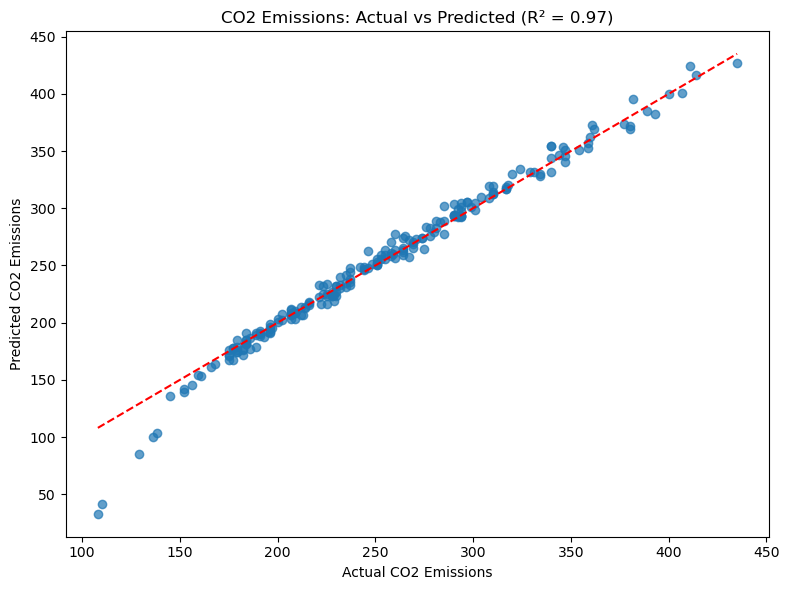

CO2 Emissions regression R²: 0.9748
                       name  year  km_driven    fuel seller_type transmission  \
0             Maruti 800 AC  2007      70000  Petrol  Individual       Manual   
1  Maruti Wagon R LXI Minor  2007      50000  Petrol  Individual       Manual   
2      Hyundai Verna 1.6 SX  2012     100000  Diesel  Individual       Manual   
3    Datsun RediGO T Option  2017      46000  Petrol  Individual       Manual   
4     Honda Amaze VX i-DTEC  2014     141000  Diesel  Individual       Manual   

          owner  selling_price  
0   First Owner          60000  
1   First Owner         135000  
2   First Owner         600000  
3   First Owner         250000  
4  Second Owner         450000  


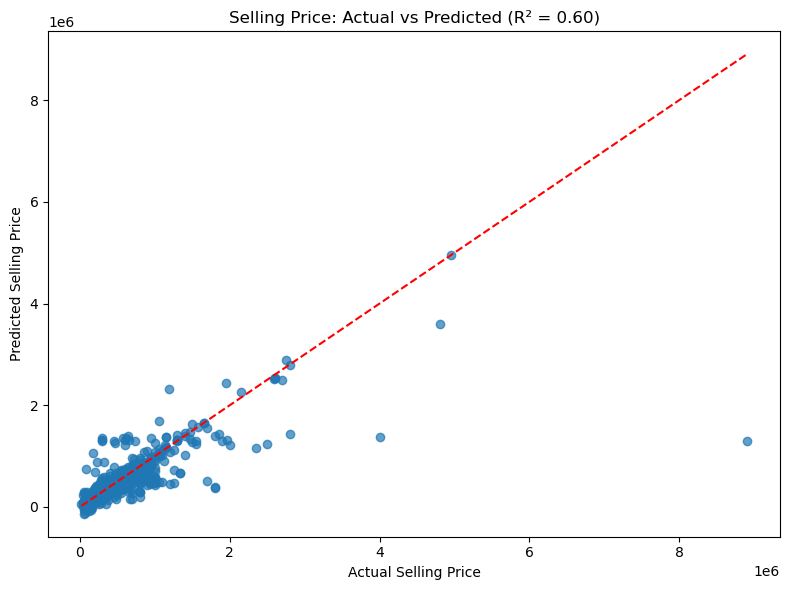

Selling price regression R²: 0.6011


In [4]:
'''Perform linear regression with L1 (Lasso) and L2 (Ridge) regularization to predict the price of a House. Use hyper-parameter tuning for the best result. Evaluate the accuracy of the models by computing relevant performance metrics, including the R² value. Generate and display a plot that compares the actual values to the predicted values (Actual vs Predicted) for both tasks.   				
Dataset: housing_price_dataset.csv
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('housing_price_dataset.csv')

# Prepare feature and target columns
feature_cols = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms',
    'Area Population'
]
target_col = 'Price'

X = df[feature_cols]
y = df[target_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 (Lasso) Regression with Grid Search
lasso = Lasso(max_iter=10000)
params_lasso = {'alpha': np.logspace(-3,2,20)}
gs_lasso = GridSearchCV(lasso, params_lasso, cv=5, scoring='r2')
gs_lasso.fit(X_train, y_train)
best_lasso = gs_lasso.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

# L2 (Ridge) Regression with Grid Search
ridge = Ridge(max_iter=10000)
params_ridge = {'alpha': np.logspace(-3,2,20)}
gs_ridge = GridSearchCV(ridge, params_ridge, cv=5, scoring='r2')
gs_ridge.fit(X_train, y_train)
best_ridge = gs_ridge.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plot: Actual vs Predicted (Lasso & Ridge)
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Lasso Regression: Actual vs Predicted (R²={r2_lasso:.4f})')

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Ridge Regression: Actual vs Predicted (R²={r2_ridge:.4f})')

plt.tight_layout()
plt.show()

print(f'Best Lasso alpha: {gs_lasso.best_params_["alpha"]:.4f} | R²: {r2_lasso:.4f}')
print(f'Best Ridge alpha: {gs_ridge.best_params_["alpha"]:.4f} | R²: {r2_ridge:.4f}')
